In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
data = pd.read_csv('/kaggle/input/online-shoppers-purchasing-intention-dataset/online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

<Axes: xlabel='ProductRelated_Duration', ylabel='BounceRates'>

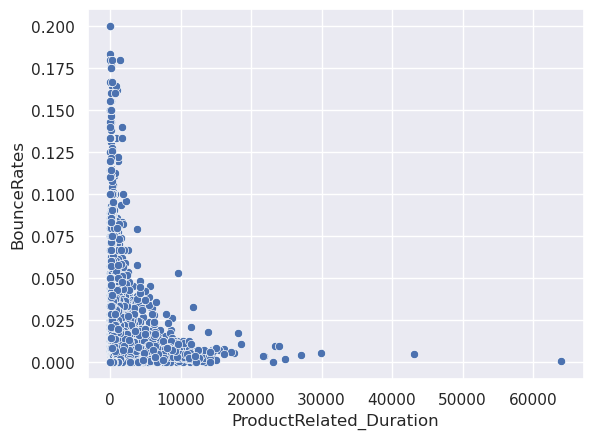

In [8]:
sns.scatterplot(data=data, x= data['ProductRelated_Duration'],y=data['BounceRates'])

In [14]:
x=data[['ProductRelated_Duration','BounceRates']]
x.head(3)

,ProductRelated_Duration,BounceRates
0,0.0,0.2
1,64.0,0.0
2,0.0,0.2


**Standarization**

In [18]:
from sklearn import preprocessing

scaled_x = preprocessing.scale(x)
scaled_x

array([[-0.62434752,  3.66718879],
       [-0.59090256, -0.457683  ],
       [-0.62434752,  3.66718879],
       ...,
       [-0.52806261,  1.26101358],
       [-0.4435357 , -0.457683  ],
       [-0.61324275, -0.457683  ]])

**The Elbow Method**

In [19]:
wcss =[]
for i in range(1,10):
    KM = KMeans(i)
    KM.fit(scaled_x)
    wcss.append(KM.inertia_)
wcss

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

[24659.999999999967,
 13696.184369720093,
 7282.618438359525,
 5081.638527067951,
 3903.146008588576,
 2809.8512209222918,
 2112.5602257309756,
 1682.9728014000414,
 1405.4117729228742]

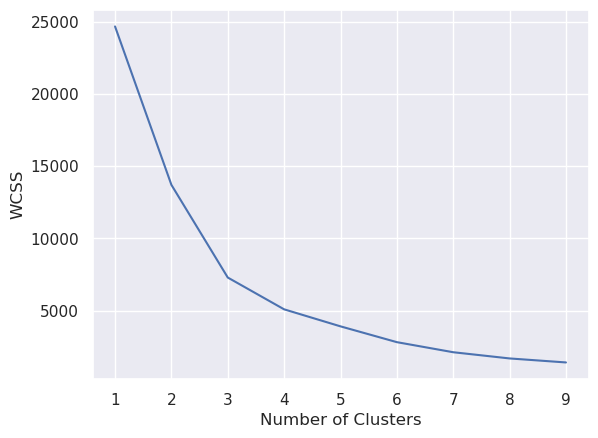

In [20]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**Clustering**

In [22]:
KMC = KMeans(3)
KMC.fit(scaled_x)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [24]:
new_x = x.copy()
new_x['Predictions'] = KMC.fit_predict(scaled_x)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clsutetr Graph

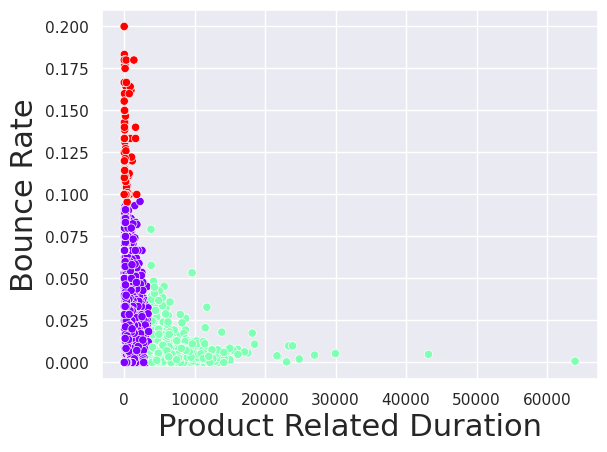

In [27]:
sns.scatterplot(data =new_x, x=new_x['ProductRelated_Duration'], y =new_x['BounceRates'],c=new_x['Predictions'],cmap='rainbow')
plt.xlabel('Product Related Duration',size=22)
plt.ylabel('Bounce Rate', size=22)
plt.show()